# LP before solving parametric LP 

__author__ = "Rahul Kakodkar"
__copyright__ = "Copyright 2023, Multi-parametric Optimization & Control Lab"
__credits__ = ["Rahul Kakodkar", "Dustin Kenefake", "Efstratios N. Pistikopoulos"]
__license__ = "Open"
__version__ = "1.0.0"
__maintainer__ = "Rahul Kakodkar"
__email__ = "cacodcar@tamu.edu"
__status__ = "Production"


## Problem Statement

In the following example a multi-scale energy systems mixed integer linear program (MILP) is reformulated as a mulitparametric linear program (mpLP)

## Nomenclature

*Sets*


$\mathcal{R}$ - set of all resources r

$\mathcal{P}$ - set of all processes p

$\mathcal{T}$ - set of temporal periods t


*Subsets*


$\mathcal{R}^{storage}$ - set of resources that can be stored

$\mathcal{R}^{sell}$ - set of resources that can be discharged

$\mathcal{R}^{demand}$ - set of resources that meet  demand

$\mathcal{R}^{cons}$ - set of resources that can be consumed

$\mathcal{P}^{uncertain-cap}$ - set of processes with uncertain capacity

$\mathcal{P}^{uncertain-capex}$ - set of processes with uncertain capital expenditure

$\mathcal{T}^{net}$ - set of temporal periods t for network level decision making

$\mathcal{T}^{sch}$ - set of temporal periods t for schedule level decision making


*Continuous Variables*


$P_{p,t}$ - production level of p $\in$  $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{sch}$  

$C_{r,t}$ - consumption of r $\in$ in $\mathcal{R}^{cons}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$S_{r,t}$ - discharge of r $\in$ in $\mathcal{R}^{demand}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$Inv_{r,t}$ - inventory level of r $\in$ $\mathcal{R}^{storage}$  in time period t $\in$ $\mathcal{T}^{sch}$

$Cap^S_{r,t}$ - installed inventory capacity for resource r $\in$  $\mathcal{R}^{storage}$ in time period t $\in$ $\mathcal{T}^{net}$

$Cap^P_{p,t}$ - installed production capacity for process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$




*Binary Variables*


$X^P_{p,t}$ - network binary for production process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$

$X^S_{r,t}$ - network binary for inventory of resource r  $\mathcal{R}^{storage}$ in time period t $\in$ $\mathcal{T}^{net}$



*Parametric Variables*


$\alpha_{p}$ - uncertainty in production capacity of process p $\in$ $\mathcal{P}^{uncertain-cap}$

$\beta_{r}$ - uncertainty in demand for resource r $\in$ $\mathcal{R}^{demand}$

$\gamma_{r}$ - uncertainty in purchase price for resource r $\in$ $\mathcal{R}^{cons}$

$\delta_{r}$ - uncertainty in consumption availability for resource r $\in$ $\mathcal{R}^{cons}$

$\epsilon_{p}$ - uncertainty in cost of technology for process p $\in$ $\mathcal{P}^{uncertain-capex}$



*Parameters*


$Cap^{P-max}_{p,t}$ - maximum production capacity of process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$

$Cap^{S-max}_{r,t}$ - maximum inventory capacity for process r $\in$ $\mathcal{R}^{storage}$ in time period t $\in$ $\mathcal{T}^{net}$

$Capex_{p,t}$ - capital expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{net}$

$Vopex_{p,t}$ - variable operational expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{sch}$

$Price_{r,t}$ - purchase price for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$C^{max}_{r,t}$ - maximum consumption availability for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$D_{r,t}$ - demand for resource r $in$ $\mathcal{R}^{sell}$ in time t $\in$ $\mathcal{T}^{sch}$




# MILP Formulation

Given is a general MILP modeling and optimization framework for simultaneous network design and scheduling.




\begin{equation}
    min \sum_{t \in \mathcal{T}^{net}} \sum_{p \in \mathcal{P}} Capex_{p,t} \times Cap^P_{p,t} + \sum_{t \in \mathcal{T}^{sch}} \sum_{r \in \mathcal{R}^{cons}}  Price_{r,t}  \times C_{r,t} + \sum_{t \in \mathcal{T}^{sch}} \sum_{p \in \mathcal{P}}  Vopex_{r,t} \times P_{r,t} 
\end{equation}


\begin{equation}
    Cap^S_{r,t} \leq Cap^{S-max}_{r,t} \times X^S_{r,t} \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
    Cap^P_{p,t} \leq Cap^{P-max}_{p,t} \times X^P_p  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}
\end{equation} 

\begin{equation}
    P_{p,t} \leq Cap^{P}_{p,t}  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{sch}
\end{equation} 

\begin{equation}
    Inv_{r,t} \leq Cap^{S}_{r,t}  \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{sch}
\end{equation} 


\begin{equation}
    - S_{r,t} \leq - D_{r,t}  \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
    C_{r,t} \leq C^{max}_{r,t} \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}


\begin{equation}
    - S_{r,t} + \sum_{p \in \mathcal{P}} P_{p,t} \times \eta(p,r) = 0 \hspace{1cm} \forall r \in \mathcal{R}^{sell}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
    -Inv_{r,t} + \sum_{p \in \mathcal{P}} P_{p,t} \times \eta(p,r) = 0 \hspace{1cm} \forall r \in \mathcal{R}^{stored}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
    \sum_{p \in \mathcal{P}} P_{p,t} \times \eta(p,r) + C_{r,t} = 0 \hspace{1cm} \forall r \in \mathcal{R}^{cons}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
    S_{r,t}, C_{r,t}, Inv_{r,t}, P_{p,t}, Cap^P_p, Cap^S_r \in R_{\geq 0}
\end{equation}




## mpLP reformulation

Reformulated as an mpLP


\begin{equation}
    min \hspace{1cm} \sum_{p \in \mathcal{P}} Capex_p \times \epsilon_p \times P_p + \sum_{r \in \mathcal{R}^{cons}} C_r \times \gamma_r 
\end{equation}


\begin{equation}
    Inv_r \leq Cap^{S-max}_r \hspace{1cm} \forall r \in \mathcal{R}^{stored}
\end{equation}

\begin{equation}
    - S_r \leq - D_r \times \beta_r \hspace{1cm} \forall r \in \mathcal{R}^{demand}
\end{equation}

\begin{equation}
    C_r \leq C^{max}_r \times \delta_r \hspace{1cm} \forall r \in \mathcal{R}^{cons} 
\end{equation}

\begin{equation}
    P_p \leq Cap^{P-max}_p \times \alpha_p \hspace{1cm} \forall p \in \mathcal{P}
\end{equation} 

\begin{equation}
    - S_{r} + \sum_{p \in \mathcal{P}} P_{p} \times \eta(p,r) = 0 \hspace{1cm} \forall r \in \mathcal{R}^{sell}
\end{equation}

\begin{equation}
    - Inv_{r} + \sum_{p \in \mathcal{P}} P_{p} \times \eta(p,r) = 0 \hspace{1cm} \forall r \in \mathcal{R}^{stored}
\end{equation}

\begin{equation}
    \sum_{p \in \mathcal{P}} P_{p} \times \eta(p,r) + C_{r} = 0 \hspace{1cm} \forall r \in \mathcal{R}^{cons}
\end{equation}

\begin{equation}
    \alpha_p \in A_p \hspace{1cm} \forall p \in \mathcal{P}
\end{equation}

\begin{equation}
    \beta_r \in B_r \hspace{1cm} \forall r \in \mathcal{R}^{demand}
\end{equation}

\begin{equation}
    \gamma_r \in \Gamma_r \hspace{1cm} \forall r \in \mathcal{R}^{cons}
\end{equation}

\begin{equation}
    \delta_r \in \Delta_r \hspace{1cm} \forall r \in \mathcal{R}^{cons}
\end{equation}

\begin{equation}
    \epsilon_p \in E_p \hspace{1cm} \forall p \in \mathcal{P}
\end{equation}


\begin{equation}
    S_r, C_r, Inv_r, P_p \in R_{\geq 0}
\end{equation}


## Example Problem


\begin{equation}
    p \in \{LI_c, LI_d, WF, PV\} 
\end{equation}


\begin{equation}
    r \in \{charge, power, wind, solar\} 
\end{equation}



\begin{equation}
    min \hspace{1cm} \left[\begin{matrix}1302\\0\\990\\567\end{matrix}\right]^T \left[\begin{matrix}P_{LI_c}\\P_{LI_d}\\P_{WF}\\P_{PV}\end{matrix}\right]
\end{equation}



\begin{equation}
    I_3\left[\begin{matrix}Inv_{charge}\\C_{wind}\\C_{solar}\\P_{LI_c}\\P_{LI_d}\end{matrix}\right] \leq \left[\begin{matrix} 100\\100\\100\\100\\100\end{matrix}\right]
\end{equation}



\begin{equation}
    I_3\left[\begin{matrix}-S_{power}\\P_{WF}\\P_{PV}\end{matrix}\right] \leq \left[\begin{matrix}-300 & 0 & 0\\0 & 100 & 0\\0 & 0 & 100\end{matrix}\right] \left[\begin{matrix}\beta_{power}\\ \alpha_{WF}\\\alpha_{PV}\end{matrix}\right]
\end{equation}



\begin{equation}
    I_4\left[\begin{matrix} - Inv_{charge} \\ -S_{power} \\ C_{wind} \\ C_{solar} \end{matrix}\right] + \left[\begin{matrix}0.89 & -1 & 0 & 0\\-1 & 1 & 0.85 & 0.75\\0 & 0 & -1 & 0\\0 & 0 & 0 & -1\end{matrix}\right] \left[\begin{matrix}P_{LI_c}\\P_{LI_d}\\P_{WF}\\P_{PV}\end{matrix}\right] = 0
\end{equation}



\begin{equation}
    \alpha_p \in \mathcal{A}_p \hspace{1cm} \forall p \in \{WF, PV\} 
\end{equation}

\begin{equation}
    \beta_r \in \mathcal{B}_r \hspace{1cm} \forall r \in \{Power\} 
\end{equation}

$\textbf{Import modules}$

In [67]:
import sys
sys.path.append('../../src')

In [68]:
from energiapy.components.result import Result
# import polytope as pt
from ppopt.plot import parametric_plot
from ppopt.mp_solvers.solve_mpqp import solve_mpqp, mpqp_algorithm
from ppopt.mplp_program import MPLP_Program
from ppopt.mpqp_program import MPQP_Program
import numpy
import pandas
import sympy
from energiapy.model.solve import solve
from energiapy.plot.plot_results import CostY, CostX
from energiapy.plot import plot_results, plot_scenario
from energiapy.model.formulate import formulate, Constraints, Objective, ModelClass
from energiapy.components.scenario import Scenario
from energiapy.components.location import Location
from energiapy.components.process import Process, VaryingProcess
from energiapy.components.resource import Resource, VaryingResource
from energiapy.components.material import Material
from energiapy.components.temporal_scale import TemporalScale
from energiapy.conversion.photovoltaic import solar_power_output
from energiapy.conversion.windmill import wind_power_output
from energiapy.utils.math_utils import min_max, normalize
from itertools import product
from matplotlib import rc
import matplotlib.pyplot as plt 

In [69]:
coord_houston = (29.56999969482422, -95.05999755859375)
weather_houston = pandas.read_csv('../data/weather_houston.csv', index_col=0)
weather_houston.index = pandas.to_datetime(weather_houston.index, utc = True)

solar_houston = solar_power_output(data= weather_houston, coord=coord_houston, sam = 'cecmod', module_params= 'Canadian_Solar_Inc__CS5P_220M', 
                                   inverter = 'cecinverter', inverter_params= 'ABB__MICRO_0_25_I_OUTD_US_208__208V_', 
                                   temperature_params= 'open_rack_glass_glass', aoi_model= 'no_loss', ac_model= 'sandia', spectral_model= 'no_loss')

wind_houston = wind_power_output(data= weather_houston, roughness_length= 0.1, turbine_type= 'V100/1800', hub_height= 92, 
                                 wind_speed_model= 'logarithmic', density_model = 'ideal_gas', temperature_model = 'linear_gradient', 
                                 power_output_model = 'power_coefficient_curve', density_correction = True, obstacle_height = 0, 
                                 observation_height = 10)

# Get [hourly power demand data](https://www.ercot.com/gridinfo/load/load_hist)  for Houston from ERCOT Coastal region
ercot = pandas.read_csv('../data/ercot.csv', index_col=0)
ercot.index = pandas.to_datetime(ercot.index, utc = True)
ercot.loc['2016-11-06 23:00:00'] = ercot.loc['2016-11-06 22:00:00'] #random missing value


C:\Users\cacodcar\AppData\Local\Temp\ipykernel_26556\2642984639.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weather_houston.index = pandas.to_datetime(weather_houston.index, utc = True)
C:\Users\cacodcar\AppData\Local\Temp\ipykernel_26556\2642984639.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ercot.index = pandas.to_datetime(ercot.index, utc = True)


In [70]:
solar = normalize(solar_houston)
wind = normalize(wind_houston)
demand = normalize(ercot)


$\textbf{Define temporal scale}$


In [71]:
scales = TemporalScale(discretization_list=[1, 8760])


$\textbf{Declare resources}$

In [72]:
Solar = Resource(name='Solar', cons_max=1000, basis='MW', label='Solar Power')

Wind = Resource(name='Wind', cons_max=1000, basis='MW', label='Wind Power')

Power = Resource(name='Power', basis='MW', label='Power generated', demand = True, varying = [VaryingResource.DETERMINISTIC_DEMAND])

# H2O = Resource(name='H2O', cons_max=100, basis='tons', label='Water', varying= [VaryingResource.UNCERTAIN_AVAILABILITY], varying_bounds= (0.3, 0.95))
H2O = Resource(name='H2O', cons_max=5000, basis='tons', label='Water')

O2 = Resource(name='O2', sell=True, basis='tons', label='Oxygen')

H2 = Resource(name='H2', basis='tons', label='Hydrogen', demand= True) #, varying = [VaryingResource.UNCERTAIN_DEMAND], varying_bounds  = (0.6, 0.8))


Uranium = Resource(name='Uranium', cons_max=1000,
                   price=42.70/(250/2), basis='kg', label='Uranium')



$\textbf{Declare processes}$

In [73]:
LiI = Process(name='LiI', storage=Power, vopex=1302, capex=0, fopex=0,  prod_max=500,
              storage_loss=0.11,  label='Lithium-ion battery', basis='MW', store_max=1000)

PEM = Process(name='PEM', conversion={Power: -1, H2: 0.3537, O2: 2.8302, H2O: -3.1839}, capex=1.55*10**6, fopex=0,
              vopex=0, prod_max=1000, prod_min = 0, basis = 'tons', label = 'PEM' )


WF = Process(name='WF', conversion={Wind: -1, Power: 0.85}, vopex=990, capex=0, fopex=0,
             prod_max=1000, label='Wind mill array', basis='MW', varying = [VaryingProcess.DETERMINISTIC_CAPACITY])

PV = Process(name='PV', conversion={Solar: -1, Power: 0.75}, vopex=567, capex=0, fopex=0,
             prod_max=1000, label='Solar PV', basis='MW', varying = [VaryingProcess.DETERMINISTIC_CAPACITY])


ASMR = Process(name='ASMR', conversion={Uranium: -4.17*10**(-5), H2O: -3.364, Power: 1},
               capex=7988951, fopex=0.04*0.730, vopex=0, prod_max=500, label='Small modular reactors (SMRs)', block='power_gen')


$\textbf{Declare location(s)}$


In [74]:
region = Location(name='region', processes={PV, WF, PEM, ASMR}, capacity_factor= {PV: solar[:8760], 
        WF: wind[:8760]}, demand_factor = {Power: demand[:8760]}, demand_scale_level = 1, capacity_scale_level = 1, scales=scales, label='some region')


The combination of parameter data, locations, and transportation options generates a scenario. 

Scenarios are data sets that can be fed to models for analysis. 

In this case we are generating a scenario for the location houston. The scales need to be consistent.

In [75]:
example = Scenario(name='example', demand={region: {Power:100, H2:30}}, demand_scale_level= 1, scheduling_scale_level= 1, capacity_scale_level = 1, network=region, scales=scales, label='example scenario')
# example = Scenario(name='example', demand={region: {Power: 50}}, network=region, scales=scales, label='example scenario')


In [76]:
# lp = formulate(scenario=example, constraints={Constraints.COST, Constraints.INVENTORY,
#                  Constraints.PRODUCTION, Constraints.RESOURCE_BALANCE}, objective = Objective.MAX_DISCHARGE, objective_resource = H2)

In [77]:
lp = formulate(scenario=example, constraints={Constraints.COST, Constraints.INVENTORY,
                 Constraints.PRODUCTION, Constraints.RESOURCE_BALANCE, Constraints.DEMAND}, objective = Objective.COST)

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint production mode
constraint inventory balance
constraint demand
objective cost


In [78]:
# lp.constraint_inventory_balance.pprint()

In [79]:
results_lp = solve(name = 'results_lp', scenario = example, instance = lp, solver = 'gurobi')

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 219062 rows, 192785 columns and 519335 nonzeros
Model fingerprint: 0x1263f7cb
Coefficient statistics:
  Matrix range     [2e-05, 8e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+01, 5e+03]
Presolve removed 206680 rows and 174045 columns
Presolve time: 0.18s
Presolved: 12382 rows, 18740 columns, 28331 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier statistics:
 Dense cols : 1
 AA' NZ     : 9.592e+03
 Factor NZ  : 2.677e+04 (roughly 13 MB of memory)
 Factor Ops : 6.514e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal         

resources


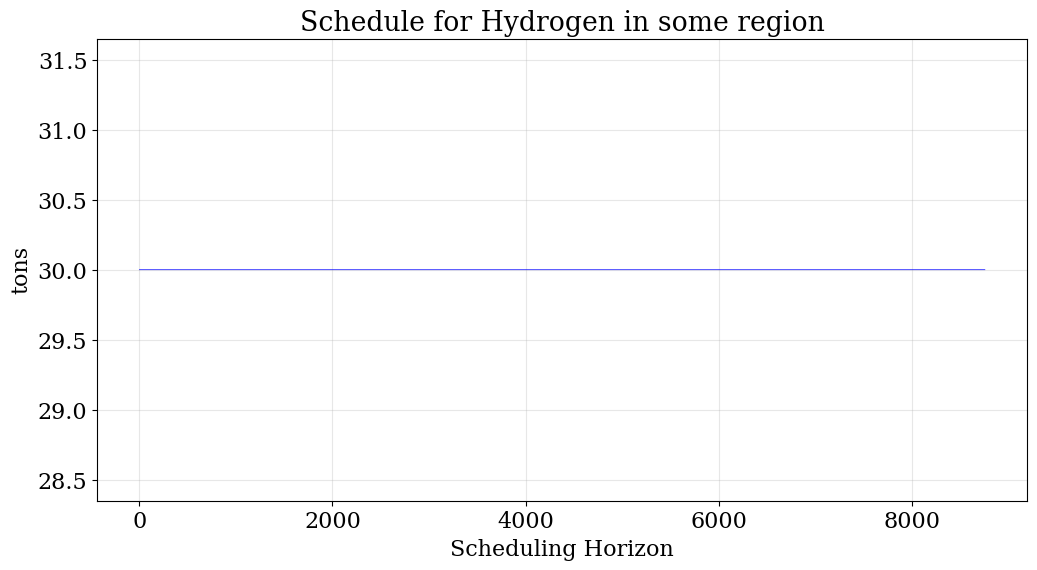

In [80]:
plot_results.schedule(results= results_lp, y_axis= 'S', component= 'H2', location= 'region')

processes


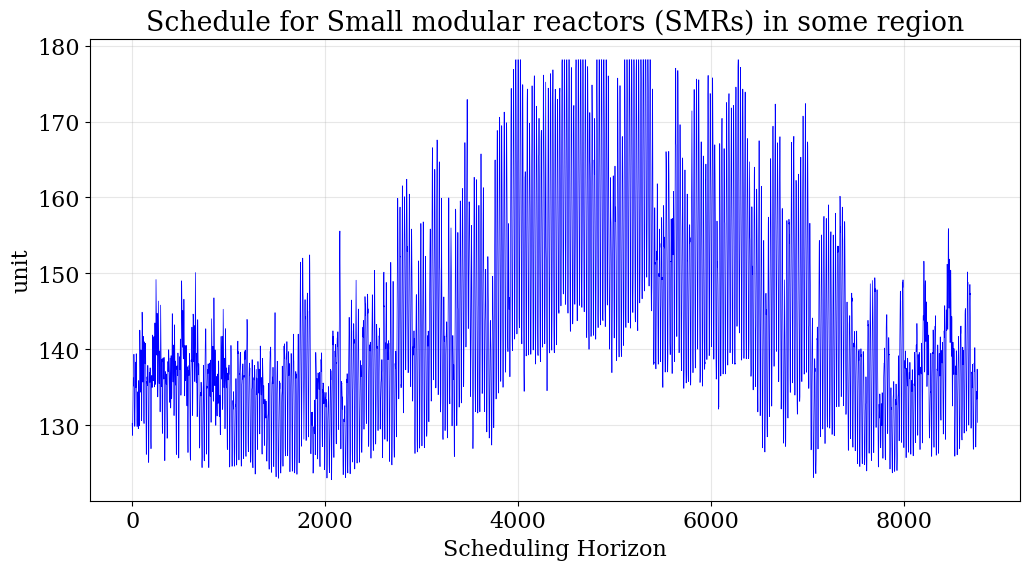

In [81]:
plot_results.schedule(results= results_lp, y_axis= 'P', component= 'ASMR', location= 'region')

In [82]:
results_lp.output['Vopex_network']

{0: 214925.41704537132}

In [83]:
results_lp.output['Capex_network']

{0: 1554692430.484266}

In [84]:
results_lp.output['Fopex_network']


{0: 5.201956112895512}

In [85]:
(results_lp.output['Vopex_network'][0] + results_lp.output['Capex_network'][0] +  results_lp.output['Fopex_network'][0])/results_lp.output['objective']

0.9999999884603172

processes


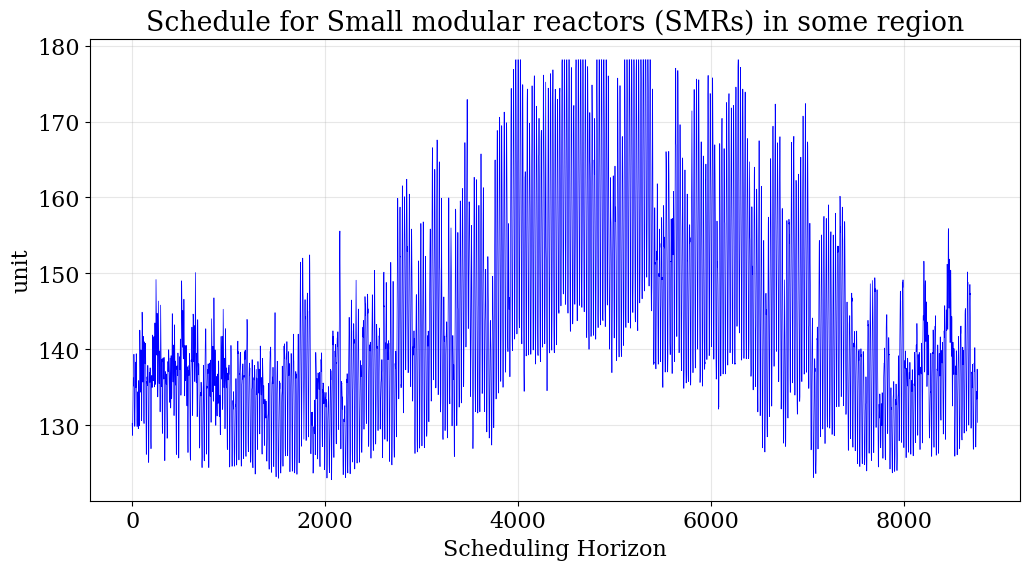

In [86]:
plot_results.schedule(results= results_lp, y_axis= 'P', component= 'ASMR', location= 'region')

In [87]:
results_lp.output['Cap_P']

{('region', 'ASMR', 0): 178.14918194847644,
 ('region', 'PEM', 0): 84.81764206955046,
 ('region', 'PV', 0): 1000.0,
 ('region', 'WF', 0): 1000.0}

processes


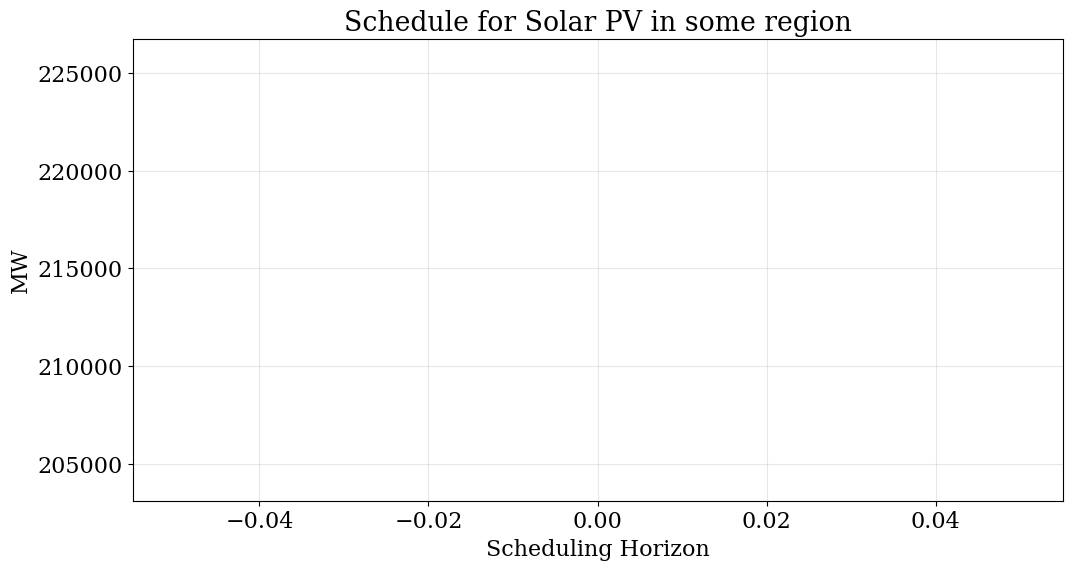

In [89]:
plot_results.schedule(results= results_lp, y_axis= 'Vopex_process', component= 'PV', location= 'region')